In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def STD(X):
    k = len(X[0])
    data_s = []
    for i in range(k):
        Xm = np.mean(X.T[i])
        Xs = np.std(X.T[i])
        data_s.append( (X.T[i]-Xm)/Xs )
    return np.array(data_s),k

def myPCA(data):
    S = 1/N*(data@data.T)
    w , v = np.linalg.eig(S)
    ii = np.argsort(w)[::-1]
    v = v.T[ii]
    return v , ii

In [2]:
data = pd.read_csv('USArrests.csv')
data = data.fillna(0)

In [3]:
ii = [1,2,3,4]
# ii = [4,5,6,7,8,12,13,14,15,17,18,19,20,21,22,23,24,25]
columns = np.array(data.keys()[ii])
X = np.array(data[columns])
N = len(X)
cities = np.array(data['Unnamed: 0'])

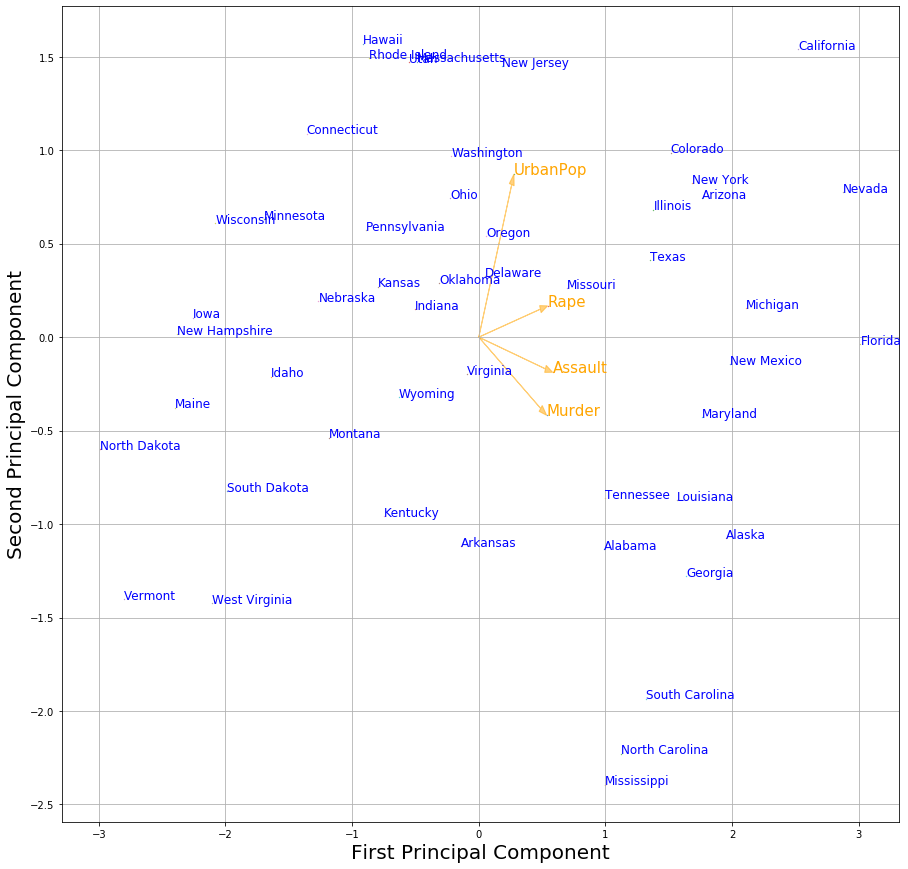

In [4]:
Xs,k = STD(X)
v, ii = myPCA(Xs)

cc = []

for i in range(N):
    x = 0
    y = 0
    for j in range(k):
        x += v[0,j]*Xs[j][i]
        y += v[1,j]*Xs[j][i]
    cc.append((x,y))
    
cc=np.array(cc)
## FIGURE ----------------------------------------

fig, ax = plt.subplots(figsize=(15,15))


for i in range(N):
    xx = cc[i,0]
    yy = cc[i,1]*-1
    ax.scatter(xx,yy,s=0.1)
    ax.text(xx,yy, cities[i], fontsize=12,color="blue")
    ax.set_xlabel("First Principal Component",size=20)
    ax.set_ylabel("Second Principal Component",size=20)
    

for i in range(k):
    xx = v[0,i]
    yy = v[1,i]*-1
    ax.scatter(xx,yy, s=0.1)
    ax.text(xx,yy, columns[i], fontsize=15,color="orange")
    ax.arrow(0,0,xx,yy,alpha=0.5, head_width=0.04, fc='orange', ec='orange', length_includes_head=True)
    
plt.grid()
plt.show()   

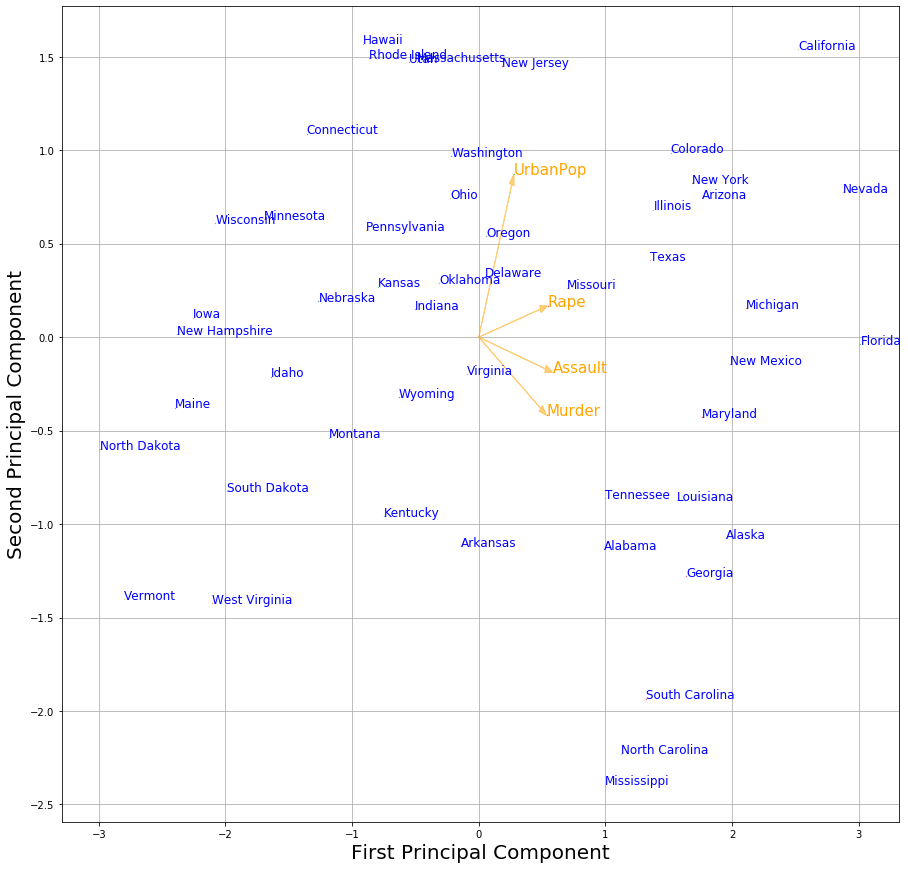

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X)
Xs = scaler.fit(X).transform(X)

k =  2
pca = PCA(n_components=k)
PC = pca.fit_transform(Xs)
v = pca.components_

x = PC[:,0]
y = PC[:,1]*-1

fig = plt.figure(figsize=(15,15))

for i in range(4):
    xx = v[0,i]
    yy = v[1,i]*-1
    plt.scatter(xx,yy, s=0.1)
    plt.text(xx,yy, columns[i], fontsize=15,color="orange")
    plt.arrow(0,0,xx,yy,alpha=0.5, head_width=0.04, fc='orange', ec='orange', length_includes_head=True)


for i in range(len(x)):
    plt.scatter(x[i],y[i],s=0.1)
    plt.text(x[i],y[i], cities[i], fontsize=12, color ="blue")
#     plt.arrow(0,0,x[i],y[i],alpha=0.1, head_width=0.03)

plt.xlabel("First Principal Component",size=20)
plt.ylabel("Second Principal Component",size=20)
plt.grid()    
plt.show()